In [1]:
import pymongo
import datetime as dt
import matplotlib.pyplot as plt

from pprint import pprint
from pymongo import MongoClient

client = MongoClient()
db = client.fit5148_assignment_db
climate_fire = db.climate_fire

%matplotlib inline

In [2]:
### Task 2.2a - Plot a bar chart to visualize the total number of fire records based on each hour ###

# Find all fire data which has a time value, get the hour value only and total number of fires
# each hour and sort by hour

res = list(climate_fire.aggregate([
    {"$unwind": "$fire"},
    {"$match": {
        "fire.time": {
            "$exists": True} # including historical data from Part A to show a more interesting graph
        }
    },
    {"$group": {
        "_id": {"$substrBytes": [ "$fire.time", 0, 2 ] },
        "total_no_fire": {"$sum": 1}
        }
    },
    {"$sort":{"_id":1}}
]))


# Loop through each value between 0 - 23 inclusive and append the missing hours to the data list
data = []

for each in res:
    hour = int(each["_id"])
    num_fires = int(each["total_no_fire"])
    data.append([hour, num_fires])

for i in range(24):
    val = any(i in x for x in data)

    if val == True:
        continue

    else:
        data.insert(i, [i,0])

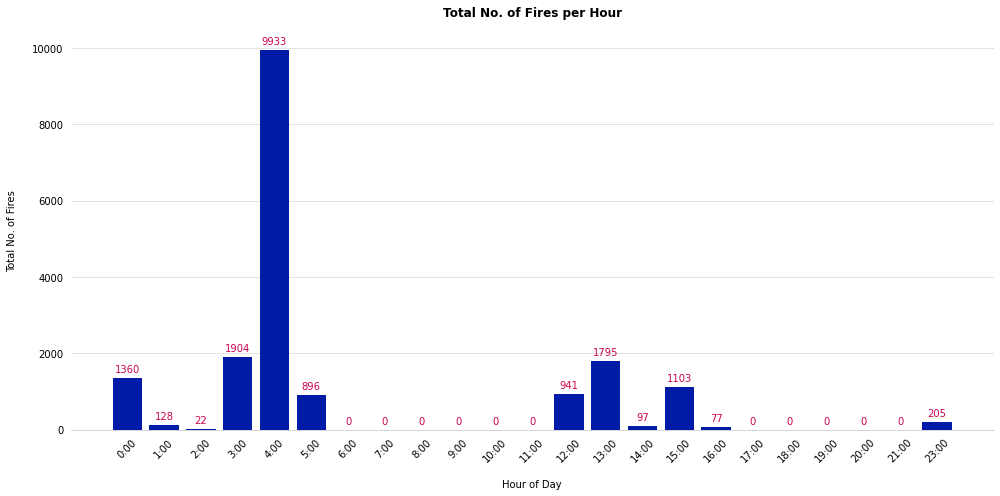

In [3]:
xs, ys = [*zip(*data)]
xs = list(xs)

# Add :00 to make numbers appear as time
xs_new = [str(x)+":00" for x in xs]

plt.rcParams['figure.figsize'] = (14, 7)

fig, ax = plt.subplots()

bars = ax.bar(
    x = xs_new,
    height = ys,
    tick_label= xs_new,
    color = "#001ca6")

# Format axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_color("#CCCCCC")
ax.tick_params(bottom=False, left=False)
ax.set_xticklabels(xs_new, rotation=45)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color="#DDDDDD")
ax.xaxis.grid(False)

# Add total number of fires text to bars
for each in bars:
    ax.text(
        each.get_x() + each.get_width() / 2, # x position of text
        each.get_height() + 100, # y position of text
        round(each.get_height(), 1), 
        ha='center',
        va='bottom',
        color="#cc0452")
    

# Add title and axes labels
ax.set_xlabel("Hour of Day", labelpad=15, color="#000000")
ax.set_ylabel("Total No. of Fires", labelpad=15, color="#000000")
ax.set_title("Total No. of Fires per Hour", pad=15, color="#000000", weight="bold")


# Display chart
fig.tight_layout()